In [20]:
import numpy as np
import pandas as pd

In [115]:
# corpus = ['The cat sat on the mat',
#           'The dog ran in the park',
#           'The bird sang in the tree']
corpus=["the weather is hot under the sun",
   "I make my hot chocolate with milk",
   "one hot encoding",
   "I will have a chai latte with milk",
   "ther is a hot sale today"]

In [116]:
from keras.preprocessing import text

In [117]:
tokenizer=text.Tokenizer()

In [118]:
tokenizer.fit_on_texts(corpus)

In [119]:
id2word={v:k for k,v in tokenizer.word_index.items()}
id2word

{1: 'hot',
 2: 'the',
 3: 'is',
 4: 'i',
 5: 'with',
 6: 'milk',
 7: 'a',
 8: 'weather',
 9: 'under',
 10: 'sun',
 11: 'make',
 12: 'my',
 13: 'chocolate',
 14: 'one',
 15: 'encoding',
 16: 'will',
 17: 'have',
 18: 'chai',
 19: 'latte',
 20: 'ther',
 21: 'sale',
 22: 'today'}

In [120]:
wids=tokenizer.texts_to_sequences(corpus)
wids

[[2, 8, 3, 1, 9, 2, 10],
 [4, 11, 12, 1, 13, 5, 6],
 [14, 1, 15],
 [4, 16, 17, 7, 18, 19, 5, 6],
 [20, 3, 7, 1, 21, 22]]

In [121]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

23

In [122]:
embed_size=100

# creating skip grams

In [143]:
from keras.preprocessing.sequence import skipgrams

In [144]:
x=[]
y=[]
for wid in wids:
    sg=skipgrams(wid,vocabulary_size=vocab_size,window_size=2)
    x.append(sg[0])
    y.append(sg[1])
    print(sg)

([[8, 3], [10, 11], [2, 8], [1, 3], [3, 9], [10, 15], [8, 1], [2, 3], [3, 8], [9, 16], [1, 13], [1, 9], [3, 15], [9, 2], [10, 2], [2, 9], [8, 5], [1, 8], [9, 18], [9, 10], [1, 2], [8, 2], [1, 2], [3, 1], [1, 4], [1, 13], [8, 20], [3, 15], [2, 1], [2, 10], [3, 3], [2, 10], [3, 2], [9, 13], [2, 1], [10, 9], [2, 9], [8, 16], [9, 11], [3, 2], [2, 6], [9, 1], [2, 3], [9, 3]], [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1])
([[5, 19], [13, 12], [5, 18], [1, 13], [4, 17], [1, 21], [5, 13], [13, 7], [12, 1], [5, 1], [6, 6], [12, 1], [12, 13], [6, 5], [1, 11], [12, 20], [1, 5], [13, 1], [4, 12], [12, 17], [11, 16], [11, 1], [13, 2], [5, 18], [12, 22], [4, 18], [6, 10], [11, 4], [4, 11], [13, 5], [13, 5], [11, 19], [6, 13], [1, 14], [1, 12], [1, 11], [13, 20], [12, 4], [1, 14], [5, 6], [11, 12], [12, 11], [11, 2], [13, 6]], [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 

In [145]:
x=np.vstack(x)
y=np.hstack(y)

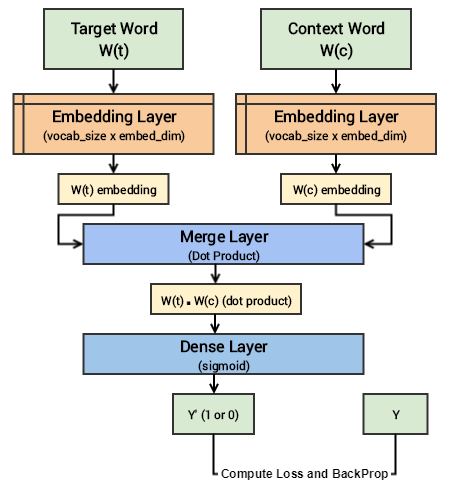

In [146]:
from keras.layers import Embedding,Dense,Dot,Reshape,Input
from keras.models import Model

In [147]:
word_input = Input(shape=(1,))
word_embedding=Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",)(word_input)
word_embedding=Reshape((embed_size,))(word_embedding)

context_input = Input(shape=(1,))
context_embedding=Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform")(context_input)
context_embedding=Reshape((embed_size,))(context_embedding)

merge=Dot(axes=1)([word_embedding,context_embedding])
output=Dense(1,activation='sigmoid')(merge)

model=Model(inputs=[word_input,context_input],outputs=output)

In [148]:
X=[x[:,0],x[:,1]]
Y=y

In [149]:
model.compile(loss="mean_squared_error", optimizer="rmsprop",metrics=['accuracy'])


In [150]:
epochs=100

history=model.fit(x=X,y=Y,epochs=epochs)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.4894
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2470 - accuracy: 0.5798
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.6117
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.6596
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.6915
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2388 - accuracy: 0.7074
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.7287
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.7500
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2327 - accuracy: 0.7926
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.7979
Epoch 11/100
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.8617
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.8617
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.8617
Epoch 87/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.8617
Epoch 88/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.8617
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.8511
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.8617
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.8511
Epoch 92/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.8511
Epoch 93/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.8511
Epoch 94/100
6/6 [===============

In [151]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 1, 100)       2300        ['input_7[0][0]']                
                                                                                                  
 embedding_7 (Embedding)        (None, 1, 100)       2300        ['input_8[0][0]']                
                                                                                            

In [152]:
#we get weight of the word embedding layer
embeddings=model.layers[2].get_weights()[0][1:]

In [153]:
pd.DataFrame(embeddings,index=id2word.values())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
hot,0.061357,0.104582,-0.031589,0.280250,0.081142,0.145150,-0.014200,-0.010957,0.151438,0.065407,...,-0.091394,0.210192,-0.103089,-0.159359,0.173525,0.099010,-0.025868,0.214954,0.247523,0.159543
the,-0.120401,-0.248996,-0.252320,0.171070,-0.054246,0.071918,-0.126215,0.077879,-0.163757,0.209295,...,-0.225649,-0.057956,0.179014,-0.203335,-0.235871,0.033038,-0.201052,0.033200,-0.155673,0.211775
is,0.308971,-0.071007,0.307428,0.127741,0.074626,-0.135782,-0.304330,0.030149,-0.292577,-0.013659,...,0.289418,0.122290,-0.195754,-0.074939,-0.126210,0.066595,-0.105926,-0.461113,0.080745,0.106946
i,0.353963,0.080909,0.234181,0.252627,-0.274307,-0.467315,-0.344743,0.044509,-0.203705,-0.428538,...,-0.267469,-0.225621,-0.037504,-0.162526,0.230858,0.171316,0.125268,-0.347695,-0.003366,0.016109
with,0.086142,0.298691,0.103794,0.293198,-0.117924,0.276414,-0.084718,0.326892,-0.383472,-0.210793,...,-0.254387,0.118658,0.008735,-0.324031,-0.125955,-0.032573,-0.140088,-0.445072,0.048563,0.252884
milk,0.424957,0.462701,-0.424509,0.572165,-0.131874,-0.189789,-0.262509,0.510805,-0.180482,-0.173543,...,0.025543,-0.369693,-0.151673,-0.070231,-0.251966,0.069474,-0.381507,0.192885,0.085339,0.551631
a,-0.077415,0.226464,0.242244,-0.283607,0.001892,-0.004661,-0.091101,0.005134,-0.219822,0.104648,...,0.052974,0.031603,0.085404,-0.194552,-0.103141,-0.320790,0.394739,0.103489,-0.213522,-0.093284
weather,0.122597,0.028229,0.109173,0.045958,0.382893,0.205003,0.186175,-0.113807,0.132993,0.386601,...,-0.030721,-0.111446,0.204908,0.024670,-0.526246,0.224501,0.181585,0.010164,0.059108,-0.153956
under,-0.059312,0.145881,-0.066263,-0.171828,0.319396,-0.170102,-0.167529,-0.492878,-0.046432,0.374613,...,0.085365,0.316990,-0.174404,-0.412474,-0.579870,-0.249958,0.176024,0.038746,0.502003,-0.324320
sun,-0.363826,0.410249,-0.088846,0.205450,0.265018,-0.453582,-0.245164,-0.224705,-0.009225,0.443869,...,0.269962,-0.069267,-0.527794,-0.393723,-0.438605,0.229934,0.280360,0.017584,-0.011526,-0.355626


In [154]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


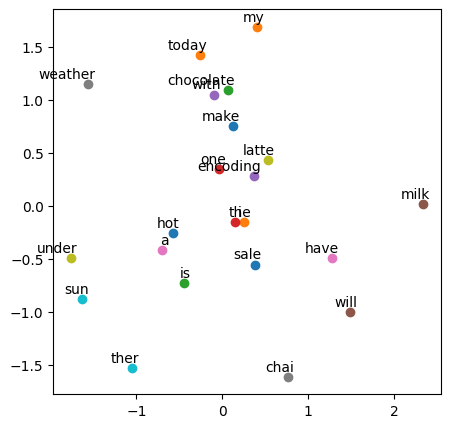

In [155]:
import matplotlib.pyplot as plt
# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i,word in id2word.items():
    x, y = reduced_embeddings[i-1]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()